In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure

from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
# Between the quotations marks, enter where the files are located in the computer
# e.g. '/Users/jsdhwdmaL/Desktop/NY City Housing/2014_bronx.xls'

bronx_2014=pd.read_excel('')
bronx_2015=pd.read_excel('')
bronx_2016=pd.read_excel('')
bronx_2017=pd.read_excel('')
bronx_2018=pd.read_excel('')
bronx_2019=pd.read_excel('')

brooklyn_2014=pd.read_excel('')
brooklyn_2015=pd.read_excel('')
brooklyn_2016=pd.read_excel('')
brooklyn_2017=pd.read_excel('')
brooklyn_2018=pd.read_excel('')
brooklyn_2019=pd.read_excel('')

manhattan_2014=pd.read_excel('')
manhattan_2015=pd.read_excel('')
manhattan_2016=pd.read_excel('')
manhattan_2017=pd.read_excel('')
manhattan_2018=pd.read_excel('')
manhattan_2019=pd.read_excel('')

queens_2014=pd.read_excel('')
queens_2015=pd.read_excel('')
queens_2016=pd.read_excel('')
queens_2017=pd.read_excel('')
queens_2018=pd.read_excel('')
queens_2019=pd.read_excel('')

statenisland_2014=pd.read_excel('')
statenisland_2015=pd.read_excel('')
statenisland_2016=pd.read_excel('')
statenisland_2017=pd.read_excel('')
statenisland_2018=pd.read_excel('')
statenisland_2019=pd.read_excel('')

In [4]:
# Manhattan
manhattan_frames = [manhattan_2019, manhattan_2018, manhattan_2017, manhattan_2016, manhattan_2015, manhattan_2014]
manhattan = pd.concat(manhattan_frames)
manhattan['SALE DATE\n'] = pd.to_datetime(manhattan['SALE DATE\n'])

# Bronx
bronx_frames = [bronx_2019, bronx_2018, bronx_2017, bronx_2016, bronx_2015, bronx_2014]
bronx = pd.concat(bronx_frames)
bronx['SALE DATE\n'] = pd.to_datetime(bronx['SALE DATE\n'])

# Brooklyn
brooklyn_frames = [brooklyn_2019, brooklyn_2018, brooklyn_2017, brooklyn_2016, brooklyn_2015, brooklyn_2014]
brooklyn = pd.concat(brooklyn_frames)
brooklyn['SALE DATE\n'] = pd.to_datetime(brooklyn['SALE DATE\n'])

# Staten Island
statenisland_frames = [statenisland_2019, statenisland_2018, statenisland_2017, statenisland_2016, statenisland_2015, statenisland_2014]
statenisland = pd.concat(statenisland_frames)
statenisland['SALE DATE\n'] = pd.to_datetime(statenisland['SALE DATE\n'])

# Queens
queens_frames = [queens_2019, queens_2018, queens_2017, queens_2016, queens_2015, queens_2014]
queens = pd.concat(queens_frames)
queens['SALE DATE\n'] = pd.to_datetime(queens['SALE DATE\n'])

In [5]:
# Total data
data_frames = [manhattan, bronx, brooklyn, statenisland, queens]
data = pd.concat(data_frames)

# Some vectorized operations
log = np.vectorize(math.log)
exp = np.vectorize(math.exp)

# Basic filtering
# the following three lines get rid of all the null values
lec = data.isnull().sum(axis=0)/len(data)
lec = lec > 0.2
data = data[data.columns[~lec]]

print(data.isnull().sum(axis=0))
data = data[data['SALE PRICE\n'] >= 100000]
data = data[data['LAND SQUARE FEET\n'] != 0]
data = data[data['GROSS SQUARE FEET\n'] != 0]
data = data[data['TOTAL UNITS\n'] != 0]
data = data[data['RESIDENTIAL UNITS\n'] != 0]
data = data[data['COMMERCIAL UNITS\n'] != 0]
data = data[data['YEAR BUILT\n']>=1750]
data['SALE YEAR'] = pd.DatetimeIndex(data['SALE DATE\n']).year
data['LOG PRICE'] = log(data['SALE PRICE\n'])

BOROUGH\n                               0
NEIGHBORHOOD\n                          0
BUILDING CLASS CATEGORY\n               0
BLOCK\n                                 0
LOT\n                                   0
ADDRESS\n                               0
ZIP CODE\n                             16
RESIDENTIAL UNITS\n                 17226
COMMERCIAL UNITS\n                  17226
TOTAL UNITS\n                       17226
LAND SQUARE FEET\n                  17227
GROSS SQUARE FEET\n                 17226
YEAR BUILT\n                         6027
TAX CLASS AT TIME OF SALE\n             0
BUILDING CLASS AT TIME OF SALE\n        0
SALE PRICE\n                            0
SALE DATE\n                             0
dtype: int64


In [6]:
manhattan = manhattan[manhattan['SALE PRICE\n'] >= 100000]
manhattan = manhattan[manhattan['LAND SQUARE FEET\n'] != 0]
manhattan = manhattan[manhattan['GROSS SQUARE FEET\n'] != 0]
manhattan = manhattan[manhattan['TOTAL UNITS\n'] != 0]
manhattan = manhattan[manhattan['RESIDENTIAL UNITS\n'] != 0]
manhattan = manhattan[manhattan['COMMERCIAL UNITS\n'] != 0]
manhattan = manhattan[manhattan['YEAR BUILT\n']>=1750]
manhattan['SALE YEAR'] = pd.DatetimeIndex(manhattan['SALE DATE\n']).year
manhattan['LOG PRICE'] = log(manhattan['SALE PRICE\n'])

In [7]:
bronx = bronx[bronx['SALE PRICE\n'] >= 100000]
bronx = bronx[bronx['LAND SQUARE FEET\n'] != 0]
bronx = bronx[bronx['GROSS SQUARE FEET\n'] != 0]
bronx = bronx[bronx['TOTAL UNITS\n'] != 0]
bronx = bronx[bronx['RESIDENTIAL UNITS\n'] != 0]
bronx = bronx[bronx['COMMERCIAL UNITS\n'] != 0]
bronx = bronx[bronx['YEAR BUILT\n']>=1750]
bronx['SALE YEAR'] = pd.DatetimeIndex(bronx['SALE DATE\n']).year
bronx['LOG PRICE'] = log(bronx['SALE PRICE\n'])

In [8]:
queens = queens[queens['SALE PRICE\n'] >= 100000]
queens = queens[queens['LAND SQUARE FEET\n'] != 0]
queens = queens[queens['GROSS SQUARE FEET\n'] != 0]
queens = queens[queens['TOTAL UNITS\n'] != 0]
queens = queens[queens['RESIDENTIAL UNITS\n'] != 0]
queens = queens[queens['COMMERCIAL UNITS\n'] != 0]
queens = queens[queens['YEAR BUILT\n']>=1750]
queens['SALE YEAR'] = pd.DatetimeIndex(queens['SALE DATE\n']).year
queens['LOG PRICE'] = log(queens['SALE PRICE\n'])

In [9]:
statenisland = statenisland[statenisland['SALE PRICE\n'] >= 100000]
statenisland = statenisland[statenisland['LAND SQUARE FEET\n'] != 0]
statenisland = statenisland[statenisland['GROSS SQUARE FEET\n'] != 0]
statenisland = statenisland[statenisland['TOTAL UNITS\n'] != 0]
statenisland = statenisland[statenisland['RESIDENTIAL UNITS\n'] != 0]
statenisland = statenisland[statenisland['COMMERCIAL UNITS\n'] != 0]
statenisland = statenisland[statenisland['YEAR BUILT\n']>=1750]
statenisland['SALE YEAR'] = pd.DatetimeIndex(statenisland['SALE DATE\n']).year
statenisland['LOG PRICE'] = log(statenisland['SALE PRICE\n'])

In [10]:
brooklyn = brooklyn[brooklyn['SALE PRICE\n'] >= 100000]
brooklyn = brooklyn[brooklyn['LAND SQUARE FEET\n'] != 0]
brooklyn = brooklyn[brooklyn['GROSS SQUARE FEET\n'] != 0]
brooklyn = brooklyn[brooklyn['TOTAL UNITS\n'] != 0]
brooklyn = brooklyn[brooklyn['RESIDENTIAL UNITS\n'] != 0]
brooklyn = brooklyn[brooklyn['COMMERCIAL UNITS\n'] != 0]
brooklyn = brooklyn[brooklyn['YEAR BUILT\n']>=1750]
brooklyn['SALE YEAR'] = pd.DatetimeIndex(brooklyn['SALE DATE\n']).year
brooklyn['LOG PRICE'] = log(brooklyn['SALE PRICE\n'])

In [11]:
def dummy_variables(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1) 
    return df

In [12]:
# exploring trends

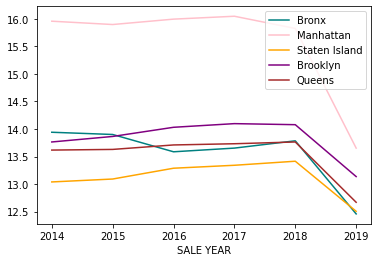

In [13]:
# Median log sale price in the boroughs over time
# Why log: to exaggerate the difference, or it will be hard to see the differnce
l1 = bronx['LOG PRICE'].groupby(bronx['SALE YEAR']).median().plot(color = 'teal', label = 'Bronx')
l1 = manhattan['LOG PRICE'].groupby(manhattan['SALE YEAR']).median().plot(color = 'pink', label = 'Manhattan')
l1 = statenisland['LOG PRICE'].groupby(statenisland['SALE YEAR']).median().plot(color = 'orange', label = 'Staten Island')
l1 = brooklyn['LOG PRICE'].groupby(brooklyn['SALE YEAR']).median().plot(color = 'purple', label = 'Brooklyn')
l1 = queens['LOG PRICE'].groupby(queens['SALE YEAR']).median().plot(color = 'brown', label = 'Queens')
l1.legend(fancybox=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

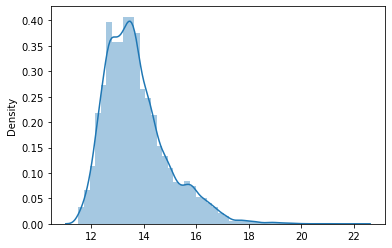

In [14]:
y = np.asarray(data['LOG PRICE'])
sns.distplot(y)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

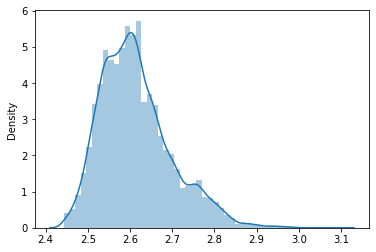

In [15]:
y_log = log(y)
sns.distplot(y_log)

<AxesSubplot:xlabel='BOROUGH\n'>

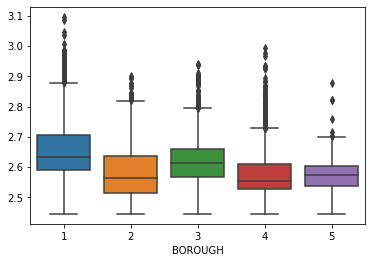

In [16]:
borough = data['BOROUGH\n']
borough = borough.astype('category')
sns.boxplot(x=borough, y = y_log)

<AxesSubplot:>

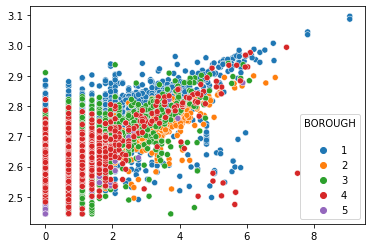

In [17]:
# log numbers of residential units vs log price
r_units = data['RESIDENTIAL UNITS\n']
r_units_log = log(r_units)
sns.scatterplot(x = r_units_log, y = y_log, hue = borough)

<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE\n'>

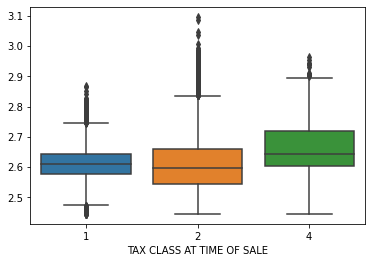

In [18]:
taxclass = data['TAX CLASS AT TIME OF SALE\n']
taxclass = taxclass.astype('category')
sns.boxplot(x= taxclass, y =y_log)

<AxesSubplot:>

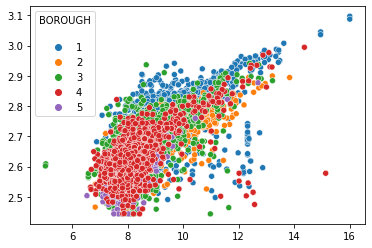

In [19]:
gsf = data['GROSS SQUARE FEET\n']
log_gsf = log(gsf)
sns.scatterplot(x=log_gsf, y = y_log, hue = borough)

In [20]:
# modeling

In [21]:
columns_selected = ['BOROUGH\n','TAX CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'GROSS SQUARE FEET\n', 'COMMERCIAL UNITS\n','RESIDENTIAL UNITS\n', 'YEAR BUILT\n']
categorical_variables = ['BOROUGH\n', 'TAX CLASS AT TIME OF SALE\n']
model_data = data[columns_selected]
y = model_data['SALE PRICE\n']
y_log = log(y)
model_data = model_data.drop(['SALE PRICE\n'], axis=1)
model_data['GROSS SQUARE FEET\n'] = log(model_data['GROSS SQUARE FEET\n'])
model_data['RESIDENTIAL UNITS\n'] = log(model_data['RESIDENTIAL UNITS\n'])
model_data['COMMERCIAL UNITS\n'] = log(model_data['COMMERCIAL UNITS\n'])
model_data = dummy_variables(model_data, categorical_variables, ['BO', 'TC', 'ZC'])
model_data = model_data.fillna(model_data.mean())

In [22]:
# linear regression
X_train, X_test, y_train, y_test = train_test_split(model_data, y_log, test_size=0.5, random_state=0)
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)
#print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'
      % r2_score((y_test), (y_pred)))

Mean squared error: 0.72
Coefficient of determination: 0.50


In [23]:
# lasso regression
X_train, X_test, y_train, y_test = train_test_split(model_data, y_log,test_size=0.5, random_state=0)
alpha=0.00099
lasso = Lasso(alpha=alpha,max_iter=50000)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print('Mean squared error: %.2f'
      % (mean_squared_error((y_test),(y_pred))))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.72
Coefficient of determination: 0.50


In [24]:
# ridge regression
X_train, X_test, y_train, y_test = train_test_split(model_data, y_log,test_size=0.5, random_state=0)
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Mean squared error: %.2f'
      % (mean_squared_error((y_test), (y_pred))))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.72
Coefficient of determination: 0.50
